In [1]:
import sys
print(sys.version)

2.7.13 |Continuum Analytics, Inc.| (default, May 11 2017, 13:17:26) [MSC v.1500 64 bit (AMD64)]


In [2]:
from pandas_datareader import data
from matplotlib import pyplot as plt
import pandas as pd
import datetime
import numpy as np

print(np.__version__)
print(pd.__version__)

1.14.0
0.21.0


In [3]:
# Define the instruments to download

companies_dict = {
    'Amazon': 'AMZN',
    'Apple': 'AAPL',
    'Walgreen': 'WBA',
    'Northrop Grumman': 'NOC',
    'Boeing': 'BA',
    'Lockheed Martin': 'LMT',
    'McDonalds':  'MCD',
    'Intel': 'INTC',
    'Navistar': 'NAV',
    'IBM': 'IBM',
    'Texas Instruments': 'TXN',
    'MasterCard': 'MA',
    'Microsoft': 'MSFT',
    'General Electrics': 'GE',
    'Symantec': 'SYMC',
    'American Express': 'AXP',
    'Pepsi': 'PEP',
    'Coca Cola': 'KO',
    'Johnson & Johnson': 'JNJ',
    'Toyota': 'TM',
    'Honda': 'HMC',
    'Mistubishi': 'MSBHY',
    'Sony': 'SNE',
    'Exxon': 'XOM',
    'Chevron': 'CVX',
    'Valero Energy': 'VLO',
    'Ford': 'F',
    'Bank of America': 'BAC'}
    
companies = sorted(companies_dict.items(), key=lambda x: x[1])
print(companies)

[('Apple', 'AAPL'), ('Amazon', 'AMZN'), ('American Express', 'AXP'), ('Boeing', 'BA'), ('Bank of America', 'BAC'), ('Chevron', 'CVX'), ('Ford', 'F'), ('General Electrics', 'GE'), ('Honda', 'HMC'), ('IBM', 'IBM'), ('Intel', 'INTC'), ('Johnson & Johnson', 'JNJ'), ('Coca Cola', 'KO'), ('Lockheed Martin', 'LMT'), ('MasterCard', 'MA'), ('McDonalds', 'MCD'), ('Mistubishi', 'MSBHY'), ('Microsoft', 'MSFT'), ('Navistar', 'NAV'), ('Northrop Grumman', 'NOC'), ('Pepsi', 'PEP'), ('Sony', 'SNE'), ('Symantec', 'SYMC'), ('Toyota', 'TM'), ('Texas Instruments', 'TXN'), ('Valero Energy', 'VLO'), ('Walgreen', 'WBA'), ('Exxon', 'XOM')]


In [4]:
# Define which online source to use
data_source = 'yahoo'

# Define the start and end dates
start_date = '2015-01-01'
end_date = '2017-12-31'

# Use pandas_reader.data.DataReader to load the desired stock data
panel_data = data.DataReader(companies_dict.values(), data_source, start_date, end_date)

# Print Axes Labels
print(panel_data.axes)

[Index([u'Adj Close', u'Close', u'High', u'Low', u'Open', u'Volume'], dtype='object'), DatetimeIndex(['2017-12-29', '2017-12-28', '2017-12-27', '2017-12-26',
               '2017-12-22', '2017-12-21', '2017-12-20', '2017-12-19',
               '2017-12-18', '2017-12-15',
               ...
               '2015-01-15', '2015-01-14', '2015-01-13', '2015-01-12',
               '2015-01-09', '2015-01-08', '2015-01-07', '2015-01-06',
               '2015-01-05', '2015-01-02'],
              dtype='datetime64[ns]', name=u'Date', length=755, freq=None), Index([u'AAPL', u'AMZN', u'AXP', u'BA', u'BAC', u'CVX', u'F', u'GE', u'HMC',
       u'IBM', u'INTC', u'JNJ', u'KO', u'LMT', u'MA', u'MCD', u'MSBHY',
       u'MSFT', u'NAV', u'NOC', u'PEP', u'SNE', u'SYMC', u'TM', u'TXN', u'VLO',
       u'WBA', u'XOM'],
      dtype='object')]


In [5]:
# Find Stock Open and Close Data Values
stock_close = panel_data.loc['Close']
stock_open = panel_data.loc['Open']

print(stock_close.iloc[1])

AAPL      171.080002
AMZN     1186.099976
AXP        99.699997
BA        296.350006
BAC        29.799999
CVX       125.580002
F          12.580000
GE         17.360001
HMC        34.240002
IBM       154.039993
INTC       46.220001
JNJ       140.559998
KO         45.720001
LMT       322.100006
MA        151.770004
MCD       173.100006
MSBHY      55.130001
MSFT       85.720001
NAV        43.389999
NOC       308.290009
PEP       119.349998
SNE        45.290001
SYMC       28.480000
TM        128.270004
TXN       104.820000
VLO        92.300003
WBA        72.940002
XOM        84.019997
Name: 2017-12-28 00:00:00, dtype: float64


In [28]:
# Calculate daily stock movement
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

row, col = stock_close.shape

print(row)
print(col)

movements = np.zeros([row, col])

for i in range(0,row):
    movements[i, :] = np.subtract(stock_close[i,:], stock_open[i, :])

28
755


In [29]:
for i in range(0, len(companies)):
    print('Company: {}, Change: {}'.format(companies[i][0], sum(movements[i][:])))

Company: Apple, Change: 16.689888
Company: Amazon, Change: -82.730213
Company: American Express, Change: 7.640111
Company: Boeing, Change: 102.589841
Company: Bank of America, Change: -3.480005
Company: Chevron, Change: 27.079985
Company: Ford, Change: -5.54
Company: General Electrics, Change: 4.920047
Company: Honda, Change: -8.05998
Company: IBM, Change: 15.639972
Company: Intel, Change: 19.860027
Company: Johnson & Johnson, Change: 30.629945
Company: Coca Cola, Change: 12.430009
Company: Lockheed Martin, Change: 60.239929
Company: MasterCard, Change: 24.589834
Company: McDonalds, Change: 51.770017
Company: Mistubishi, Change: 30.540025
Company: Microsoft, Change: 28.760033
Company: Navistar, Change: -0.239992
Company: Northrop Grumman, Change: 75.390085
Company: Pepsi, Change: 38.07996
Company: Sony, Change: 0.159992
Company: Symantec, Change: 13.230016
Company: Toyota, Change: -17.310087
Company: Texas Instruments, Change: 29.139915
Company: Valero Energy, Change: 29.459992
Company

In [30]:
movements.shape

(28L, 755L)

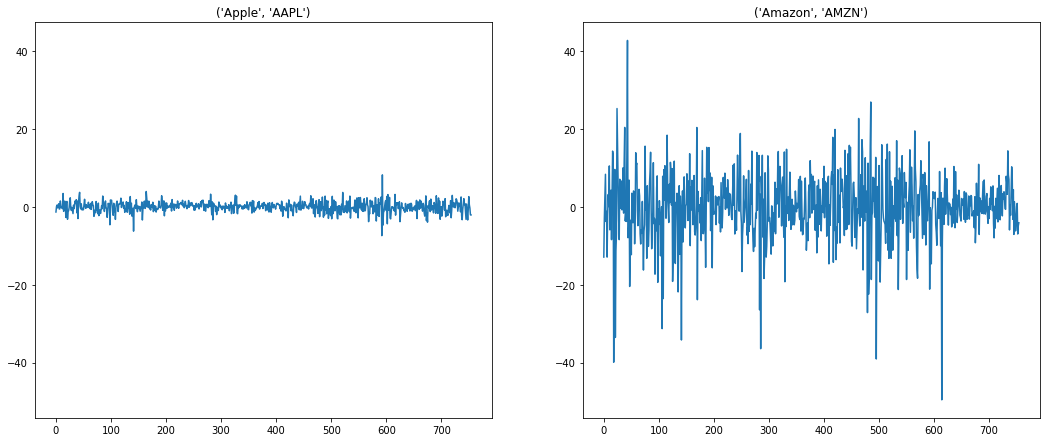

In [42]:
# Visualization - Plot Stock Movements
plt.clf
plt.figure(figsize=(18, 16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

In [38]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create the normalizer
normalizer = Normalizer()
new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.2604577947344886
-0.2599107131079274
0.0010841164877578133


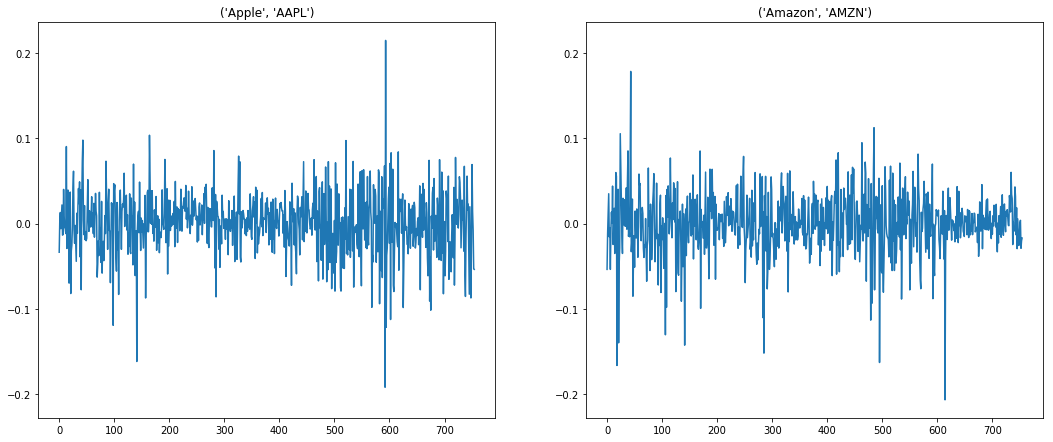

In [41]:
# Visualization - Plot Stock Movements
plt.clf
plt.figure(figsize=(18, 16))
ax1 = plt.subplot(221)
plt.plot(new[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(new[1][:])
plt.title(companies[1])
plt.show()

In [75]:
# Import necessary libraries
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer

# Define normalizer
normalizer = Normalizer()

# Create a KMeans model - 10 clusters
kmeans = KMeans(n_clusters=10, max_iter = 1000)

# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer, kmeans)

In [79]:
# Fit pipeline to daily stock movements
pipeline.fit(movements)

Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [80]:
print(kmeans.inertia_)

9.69916428749493


In [81]:
# Import pandas
import pandas as pd

# Predict the cluster labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

                   companies  labels
21               (Sony, SNE)       0
16       (Mistubishi, MSBHY)       0
20              (Pepsi, PEP)       1
11  (Johnson & Johnson, JNJ)       1
12           (Coca Cola, KO)       1
2    (American Express, AXP)       2
25      (Valero Energy, VLO)       2
4     (Bank of America, BAC)       2
1             (Amazon, AMZN)       3
22          (Symantec, SYMC)       3
17         (Microsoft, MSFT)       3
14          (MasterCard, MA)       3
15          (McDonalds, MCD)       3
27              (Exxon, XOM)       4
5             (Chevron, CVX)       4
19   (Northrop Grumman, NOC)       5
13    (Lockheed Martin, LMT)       5
3               (Boeing, BA)       5
18           (Navistar, NAV)       6
10             (Intel, INTC)       7
9                 (IBM, IBM)       7
24  (Texas Instruments, TXN)       7
0              (Apple, AAPL)       7
26           (Walgreen, WBA)       8
8               (Honda, HMC)       9
7    (General Electrics, GE)       9
6

In [88]:
from sklearn.decomposition import PCA

# Visualize the results on PCA-reduced data
reduced_data = PCA(n_components = 2).fit_transform(new)

# run kmeans on the reduced data
kmeans = KMeans(n_clusters=10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

print(kmeans.inertia_)

# Create a DataFrame aligning labels and companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster labels
print(df.sort_values('labels'))

0.10643502237298194
                   companies  labels
16       (Mistubishi, MSBHY)       0
9                 (IBM, IBM)       0
1             (Amazon, AMZN)       1
17         (Microsoft, MSFT)       1
27              (Exxon, XOM)       2
5             (Chevron, CVX)       2
7    (General Electrics, GE)       2
20              (Pepsi, PEP)       3
19   (Northrop Grumman, NOC)       3
12           (Coca Cola, KO)       3
11  (Johnson & Johnson, JNJ)       3
13    (Lockheed Martin, LMT)       3
6                  (Ford, F)       4
4     (Bank of America, BAC)       4
18           (Navistar, NAV)       4
15          (McDonalds, MCD)       5
21               (Sony, SNE)       6
10             (Intel, INTC)       6
8               (Honda, HMC)       7
2    (American Express, AXP)       7
23              (Toyota, TM)       7
25      (Valero Energy, VLO)       7
14          (MasterCard, MA)       8
22          (Symantec, SYMC)       8
24  (Texas Instruments, TXN)       8
0              (Ap

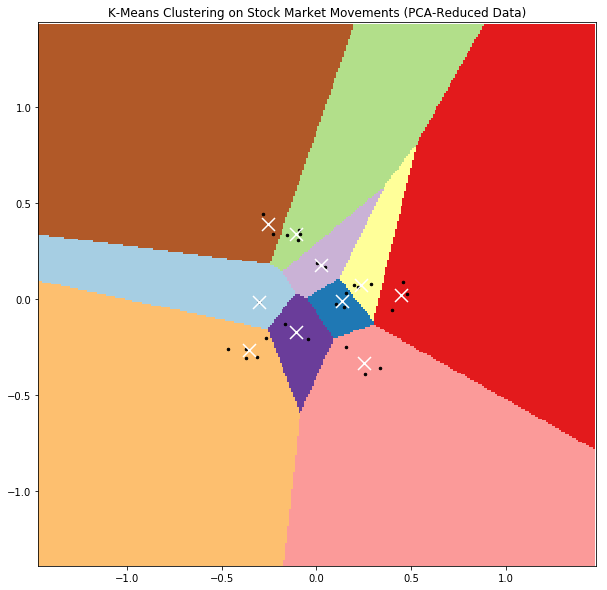

In [87]:
# Define step size of mesh.
h = 0.01

# Plot the decision boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Define colorplot
cmap = plt.cm.Paired

# Plotting figure
plt.clf()
plt.figure(figsize=(10, 10))
plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap = cmap,
          aspect = 'auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)

# Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
           marker='x', s=169, linewidths=3,
           color='w', zorder=10)

plt.title('K-Means Clustering on Stock Market Movements (PCA-Reduced Data)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

